# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Открываем файл с данными и изучаем общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/datasets/games.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

**Выведем первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Выведем основную информацию для датафрейма `data` с помощью метода `info()`**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Проверим колличество пропусков и в %:**

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


## Подготовка данных

**Заменяем названия столбцов (приводим к нижнему регистру):**

In [7]:
data.columns = data.columns.str.lower()

**Пропусков в колонках `name` и `genre` всего по 2, этими данными можно пренебречь**

In [8]:
data = data.dropna(subset=['name', 'genre'])

**Преобразуем данные в нужные типы:**

`year_of_release` - изменим на int и удалим пропуски

In [9]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('Int64')

**Посмотрим уникальный значения столбца `user_score` так как тип данныз object довольно необычный для колонки с оценками:**

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Помимо оценок и пропусков присуствует значение 'tbd'. По гуглу TBD = To Be Determined, это означает что параметр будет определен позже. Значит на текущий момент для преведения к типу float64 запомним пропуски и 'tbd' 0:**

In [11]:
data['user_score'] = data['user_score'].replace('tbd', 0)
data['user_score'] = data['user_score'].fillna(0)
data['user_score'] = data['user_score'].astype('float64')

**Также заполним пропуски в 'critic_score' значением 0**

In [12]:
data['critic_score'] = data['critic_score'].fillna(0)

**Пропуски в колонке `rating` заменим 'not_rate':**



In [13]:
data['rating'] = data['rating'].fillna('not_rate')

**Выведем окончательну информацию и количество прорусков:**

In [14]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [15]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,not_rate
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,not_rate


**Также проверим на явные дубликаты:**

In [16]:
data.duplicated().sum()

0

**Пропуски в колонках `name` и `genre` скорее всего связанны с ошибками при выгрузке данны. В колонке `rating` с тем, что игры выходили в регионе где нет организации которая дает эту оценку. Пропуски в `critic_score` могут означать что критики не дали оценку данной игре, а в `user_score` что оценок пользователей недостаточно на данном ресурсе для заполнения данного параметра.**

**Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`:**

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Иследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы:**

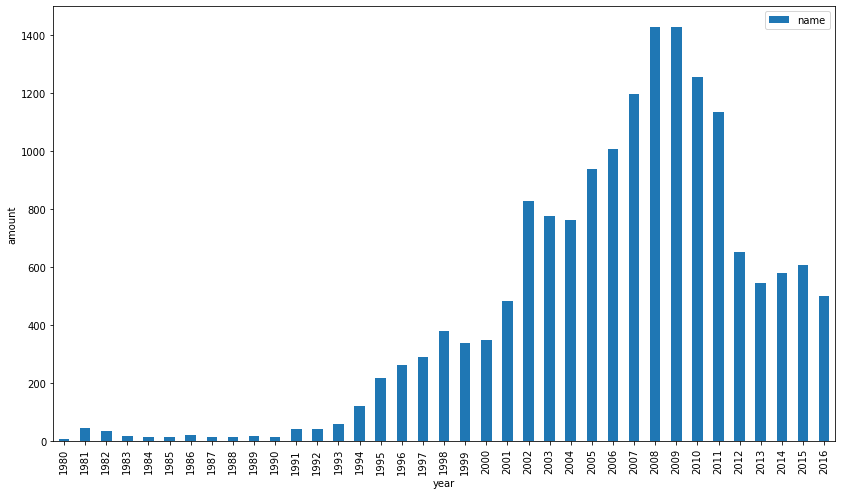

In [18]:
data.groupby('year_of_release').agg({'name':'count'}).plot(kind='bar', xlim=(1980, 2022), ylabel='amount', xlabel='year',figsize=(14,8));

Видим, что до начала девяностых игр выходило довольно мало, т. к. распостранение игровых устройств и домашних ПК было невелеко. Бурный рост наблюдается c 2002 по 2009 год, далее идет на спад.

**Посмотрим, как менялись продажи по платформам. Сначала выведем платформы с наибольшими суммарными продажами:**

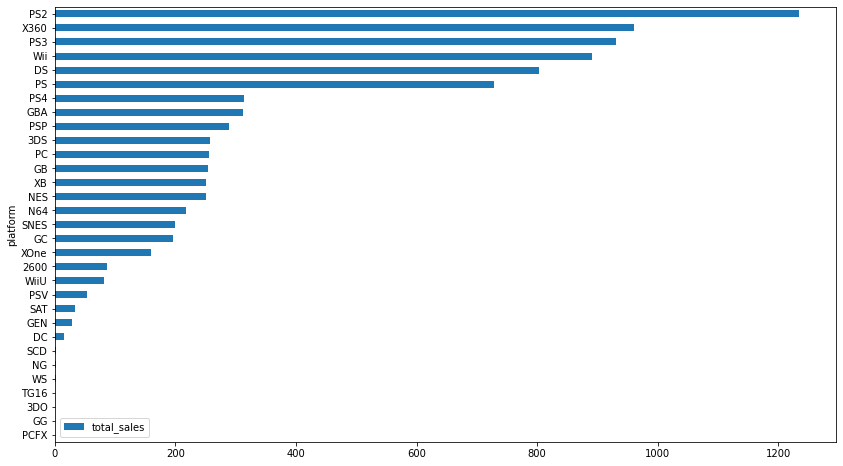

In [19]:
data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales').plot(kind='barh', ylabel='amount', xlabel='platform',figsize=(14,8));

**Выберем топ 12 платформ и построим распределение по годам (не могу я PC выбросить никак):**

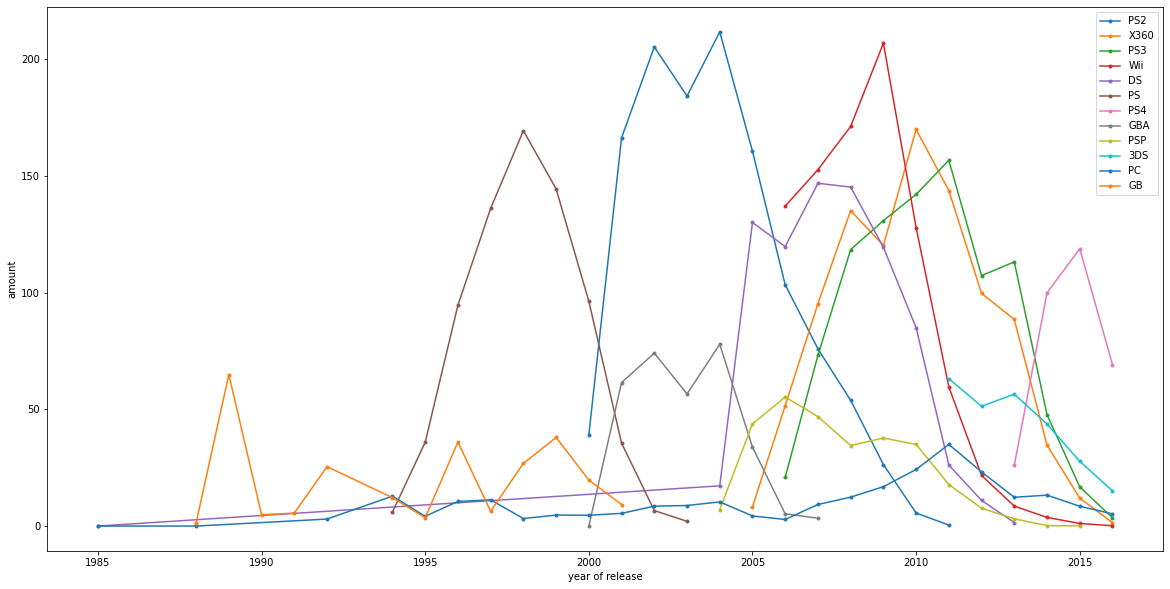

In [20]:
top12 = data.groupby('platform').agg({'total_sales':'sum'}).sort_values(by='total_sales',ascending=False).head(12)
top12_platforms = top12.index
ax = plt.gca()
legend = []
for platform in top12_platforms:
    platform_plot = data.query('platform == @platform')
    platform_plot.groupby(['year_of_release']).agg({'total_sales':'sum'}).plot(kind='line', style='.-', figsize=(20, 10),ax=ax, ylabel='amount', xlabel='year of release')
    legend.append(platform)
ax.legend(legend)    
plt.show;    

Средний срок жизни платформы около 10 лет, хотя PC - исключенеи, живет с самого начала и до сих пор. 

**Так как средний срок жизни платформы около 10 лет, актуальный период выберем с 2006 по 2016 год. Посмотрим какик платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.**

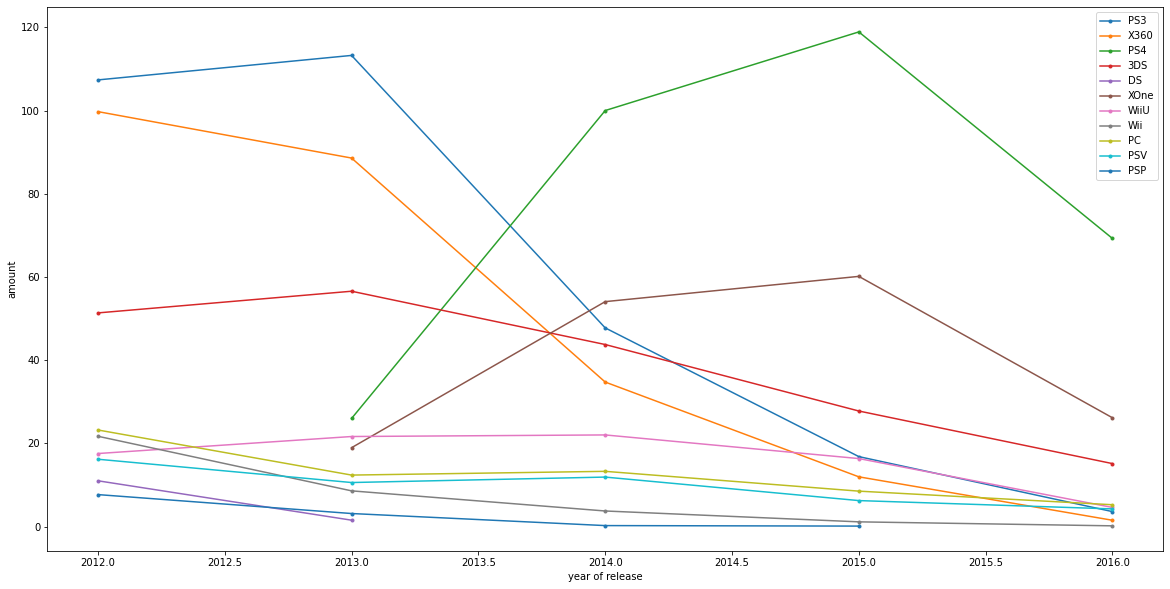

In [38]:
actual_data = data.query('year_of_release >= 2012')
actual_data_platforms = actual_data['platform'].unique()
ax = plt.gca()
legend = []
for platform in actual_data_platforms:
    platform_plot = actual_data.query('platform == @platform')
    platform_plot.groupby(['year_of_release']).agg({'total_sales':'sum'}).plot(kind='line', style='.-', figsize=(20, 10),ax=ax, ylabel='amount', xlabel='year of release')
    legend.append(platform)
ax.legend(legend)    
plt.show;   

На 2016 год в топе продаж платформы <b>PS3, X360 и PS4</b>. При этом количество выпускаемых игр падает.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам:**

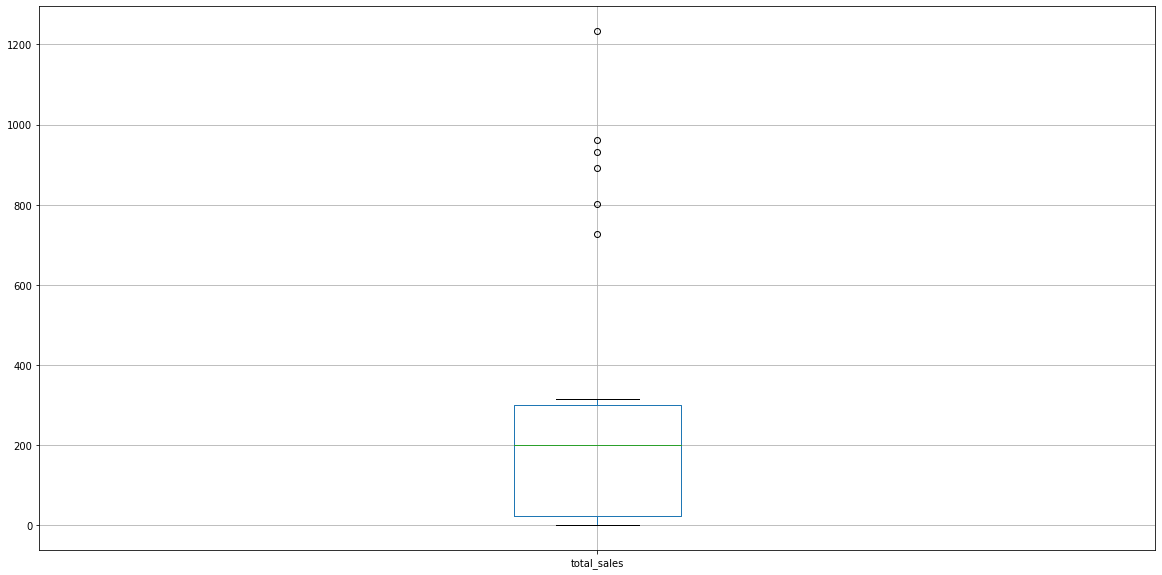

In [42]:
data.groupby('platform').agg({'total_sales':'sum'}).boxplot(figsize=(20,10));

Медианное значение продажи игр по платформам - 200 млн копий, среднее 284 млн. Особо удачливые платформы продают более 1 млрд копий.

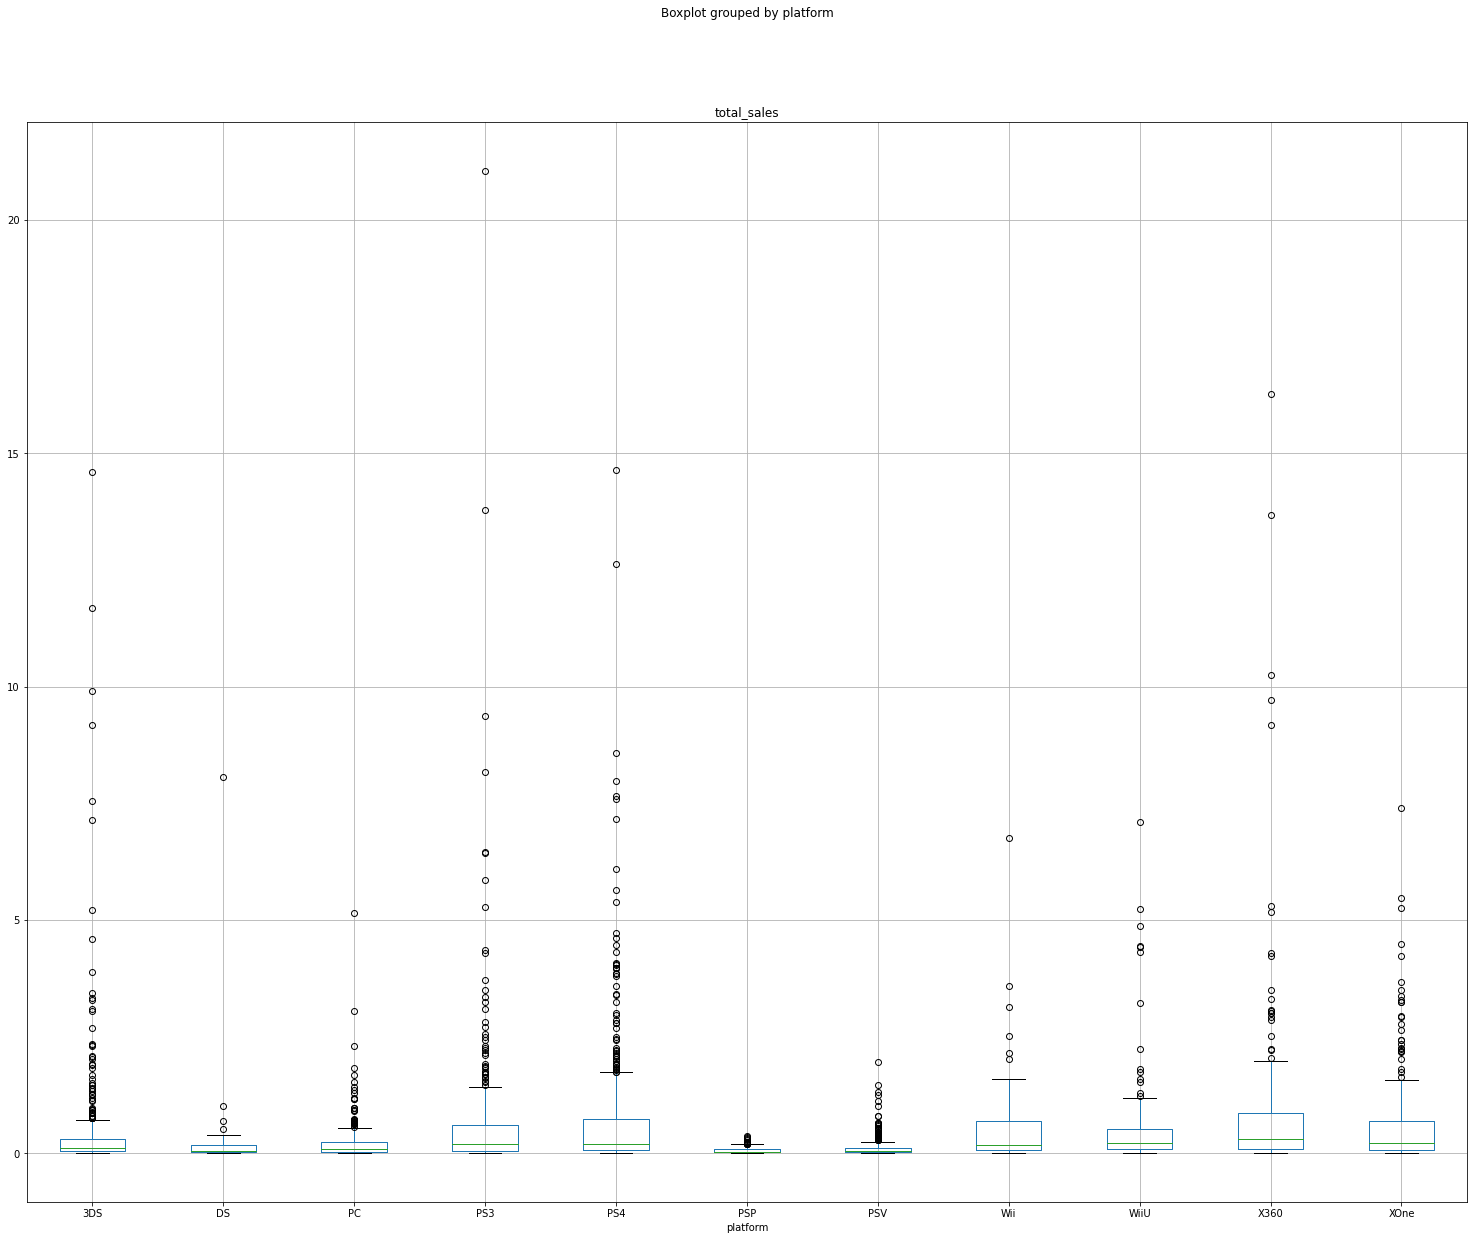

In [111]:
actual_data.boxplot(column='total_sales', by='platform', figsize=(25,20))
plt.show()

In [112]:
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
PS3,493.0,0.585781,1.462855,0.01,0.0500,0.20,0.6100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.03,0.0900,0.36
PSV,411.0,0.119659,0.203011,0.01,0.0200,0.05,0.1200,1.96
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09


 - Исходя из графиков видно, что продажи на всех платфомах ведут себя по разному.
 - Можно выделить несколько платформ: PS3 и PS4 и Xbox One и X360. Их медианные значения продаж варьируюьтся от 0.58 до 0.81 млн копий.


**Посмотрим, как влияют на продажи внутри самой популярной платформы PS2 отзывы пользователей и критиков:**

Выбререм игры с пользвательским и рейтингом критиков выше 0:

In [23]:
data_ps2 = data[(data['platform'] == 'PS2') & (data['critic_score'] > 0) & (data['user_score'] > 0)]

Построим диаграмму рассеяния зависимости общего количества продаж игры от отзывов критиков и посчитаем корреляцию между отзывами и продажами:

0.38641510284059993


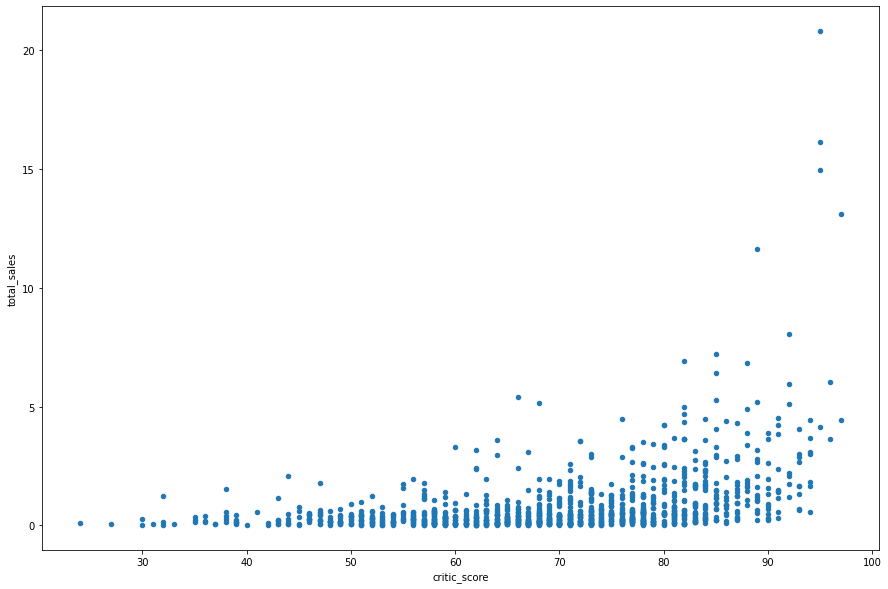

In [24]:
data_ps2.plot(kind='scatter', x='critic_score', y='total_sales', figsize=(15,10));
print(data_ps2['critic_score'].corr(data_ps2['total_sales']))

Мы видим слабую положительную корреряцию. Прямая зависимость между отзывами критиков и продажами есть но довольно слабая.

Построим диаграмму рассеяния зависимости общего количества продаж игр от отзывов пользователей и посчитаем корреляцию между отзывами и продажами:

0.17168986651472423


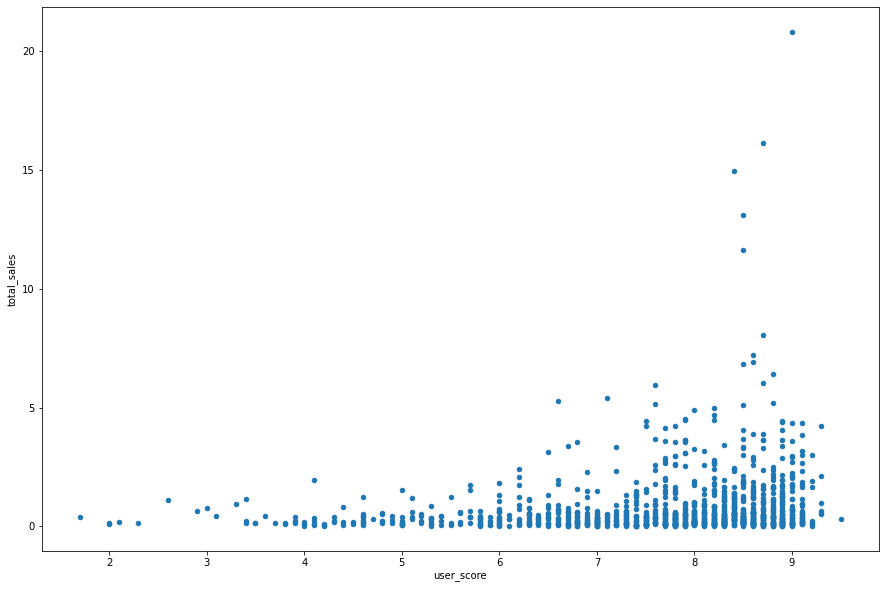

In [25]:
data_ps2.plot(kind='scatter', x='user_score', y='total_sales', figsize=(15,10));
print(data_ps2['user_score'].corr(data_ps2['total_sales']))

Корреряция положительная, но еще слабее чем с отзывами критиков.

**Соотнесем выводы с продажами игр на других платформах:**

Посчитаем корреляции между отзывами критиков и продажами топ 12 платформ:

In [26]:
for platform in top12_platforms:
    data_for_corr = data[(data['platform'] == platform) & (data['critic_score'] > 0) & (data['critic_score'] > 0)]
    print(data_for_corr['critic_score'].corr(data_for_corr['total_sales']))

0.39253647544509007
0.39286589254006954
0.4327589578997135
0.17790728577594908
0.23754579854113453
0.4466897788670505
0.40656790206178095
0.24210693503333325
0.31752451005134863
0.3487397305984834
0.257394718400985
nan


Посчитаем корреляции между отзывами пользователей и продажами топ 12 платформ:

In [27]:
for platform in top12_platforms:
    data_for_corr = data[(data['platform'] == platform) & (data['critic_score'] > 0) & (data['user_score'] > 0)]
    print(data_for_corr['user_score'].corr(data_for_corr['total_sales']))

0.17168986651472423
0.11027967172869044
0.14397783125701577
0.11063675382808996
0.13997552383458345
0.3006075888418596
-0.03362497596528878
0.11008968104344417
0.23271058709277362
0.23208872237663558
0.0035962323378451056
nan


В целом корреляции продаж с отзывами критиков и пользователей совпадают на многих платформах, за редким исключением где она отрицательная. Также есть платформа где вообще отсуствуют отзывы.

**Посмотрим на общее распределение игр по жанрам:**

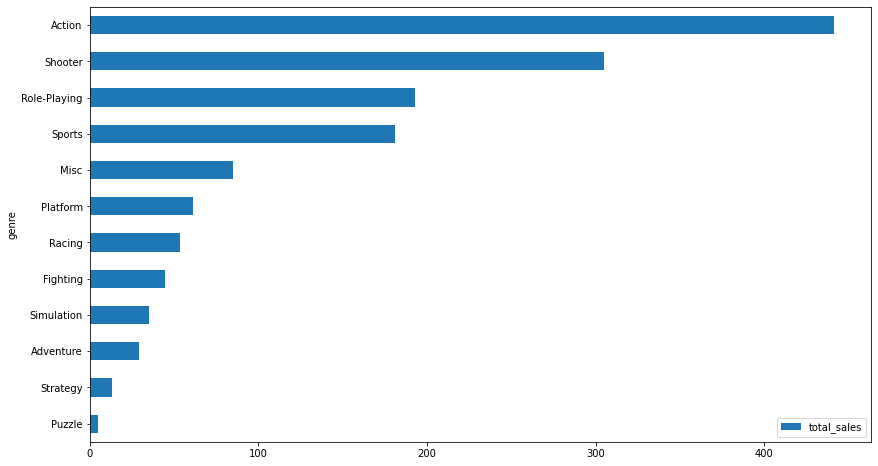

In [113]:
actual_data.groupby('genre').agg({'total_sales':'sum'}).sort_values(by='total_sales').plot(kind='barh', ylabel='amount', xlabel='genre',figsize=(14,8));

Продажи преобладают в жанрах <b>Action, Sports и Shooter</b>. Жанры <b>Strategy, Adventure и Puzzle</b> наименее востребованы пользователями.

Рассмотрим медианные и средние продажи:

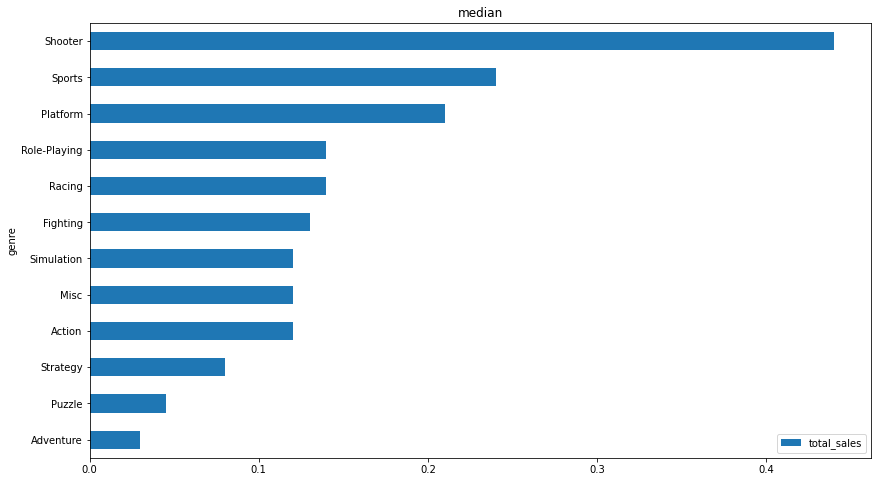

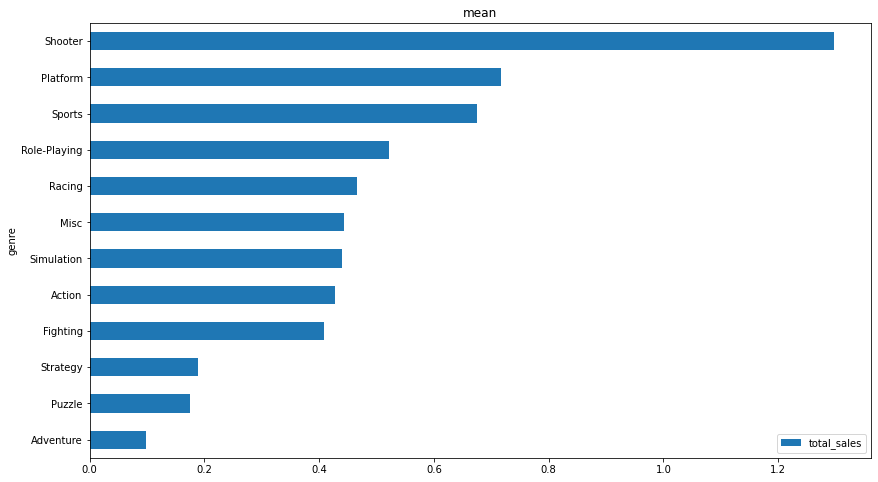

In [121]:
actual_data.groupby('genre').agg({'total_sales':'median'}).sort_values(by='total_sales').plot(kind='barh', ylabel='amount', xlabel='genre',figsize=(14,8),title='median');
actual_data.groupby('genre').agg({'total_sales':'mean'}).sort_values(by='total_sales').plot(kind='barh', ylabel='amount', xlabel='genre',figsize=(14,8),title='mean');

Если смотреть по медианныи с средним продажам, то преобладают жанры Shooter, Sports и Platform. Жанр Action ухождит их топов. Жанры Strategy, Adventure и Puzzle все еще наименее востребованы пользователями.   

## Составим портрет пользователя каждого региона

**Самые популярные платформы (топ-5)**

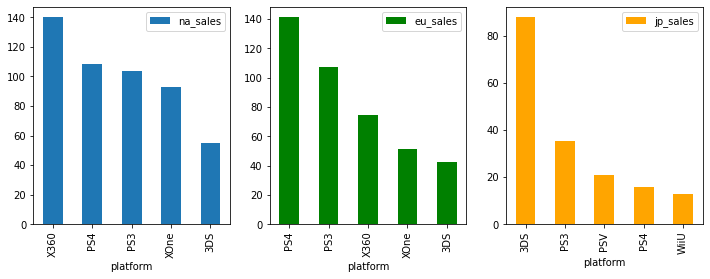

In [122]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
actual_data.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',ax=axes[0])
actual_data.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',ax=axes[1],color='green')
actual_data.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',ax=axes[2],color='orange');

В <b>Северной Америке</b> самыми популярными за исследуемый период были <b>X360</b> и <b>PS4</b>, также <b>PS3, XOne</b> и <b>3DS</b> соответственно.

В <b>Европе</b> популярны <b>PS4</b> и <b>PS3</b>, также <b>X360, XOne</b> и <b>3DS</b>

В <b>Японии</b> же <b>3DS</b> и <b>PS3</b>, также <b>PSV, PS4</b> и <b>WiiU</b>

**Самые популярные жанры (топ-5)**

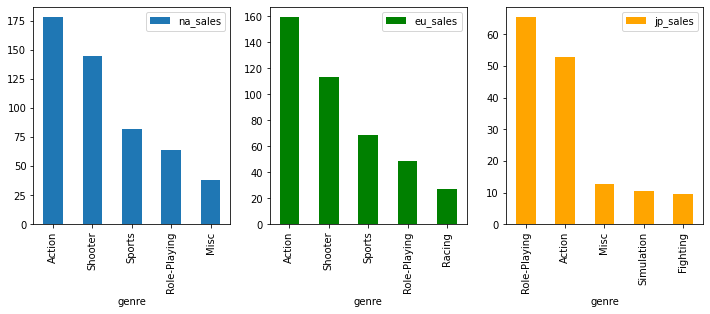

In [123]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
actual_data.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5).plot(kind='bar',ax=axes[0])
actual_data.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5).plot(kind='bar',ax=axes[1],color='green')
actual_data.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5).plot(kind='bar',ax=axes[2],color='orange');

В <b>Северной Америке и Европе</b> самые популярные жанры схожи - <b>Action, Sport и Shooter</b>. В Японии же самый популярный жанр, лидирующий с большим отрывом, <b>Role-Playing</b> и потом только  <b>Action и Sport</b>

**Влияние рейтинга ESRB на продажи в отдельном регионе.**

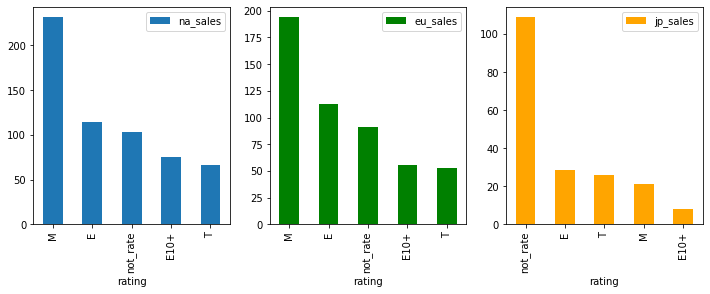

In [124]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
actual_data.groupby('rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).plot(kind='bar',ax=axes[0])
actual_data.groupby('rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).plot(kind='bar',ax=axes[1],color='green')
actual_data.groupby('rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).plot(kind='bar',ax=axes[2],color='orange');

В <b>Северной Америке</b> и в <b>Европе</b> все очень похоже. Больше всего продаются игры с рейтингом "M", далее "E" и "без рейтинга". 

В <b>Японии</b> больше всего продаются игры "без рейтинга", на втором месте с рейтингом "E", а далее "T" и "M".

## Проверка гипотез.

Для проверки использовуем t-критерий Стьюдента для независимы между собой выборок.
Пороговое значение alpha возмем общепринятое - 5%.

<b>Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</b>

H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H₁: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

In [125]:
Xbox = actual_data[(actual_data['platform'] == 'XOne') & (actual_data['user_score'] > 0)]['user_score']
PC = actual_data[(actual_data['platform'] == 'PC') & (actual_data['user_score'] > 0)]['user_score']
results = st.ttest_ind(Xbox, PC, equal_var = False)
                       
alpha = 0.05
print('p-value =',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value = 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

<b>Проверка гипотезы: Средние пользовательские рейтинги жанров Action и Sports разные;</b>

H₀: Средние пользовательские рейтинги жанров Action и Sports не отличаются.

H₁: Средние пользовательские рейтинги жанров Action и Sports отличаются.

In [127]:
Action = actual_data[(actual_data['genre'] == 'Action') & (actual_data['user_score'] > 0)]['user_score']
Sports = actual_data[(actual_data['genre'] == 'Sports') & (actual_data['user_score'] > 0)]['user_score']
results = st.ttest_ind(Action, Sports, equal_var = False)
                       
alpha = 0.05
print('p-value =',results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-value = 4.24307776572644e-20
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports отличаются.

## Общий вывод

1. Игры активно начинают продаваться с начала 2000-х тысячных годов, это связанно с массовым распостранением игровых платформ и PC. 
2. Средняя жизни игровой платформы около 10 лет, правда к PC это не относится.
3. Больше всего на количество проданных копий влияли отзывы критиков и в меньшей мере отзывы пользователей. Хотя сейчас, как мне известно ситуация обратная.
4. Наиболее распространенные жанры <b>Action, Sports, Shooter, Role-Playing</b>. Жанры <b>Strategy, Adventure и Puzzle</b> наименее востребованы пользователями.
5. Есть некоторые региональные различия между жанровыми предпочтениями пользоватеолей, а также предпочтением игровых платформ.
6. Влияние рейтинга ESRB на продажи в отдельном регионе не велико, т. к. он не везде есть.

